<Body>   
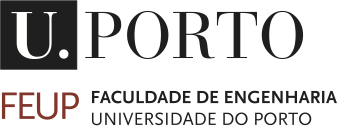   
<h1> <b>Machine Learning 2021/2022 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Armando Sousa** (asousa@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt)

FEUP, Feb. 2022

---


#Notebook 05: Kalman Filter

# Background

A Kalman Filter is an optimal estimator, that is, a process that estimates iteratively as times goes on, a given number of parameters (more precisely the state) from a dynamical system with uncertainties in the state and in the measurements. It is optimal in the sense that if all uncertainties (noises) are Gaussian, then the Kalman filter minimizes the mean square error of the estimated parameters. The workings are stochastic, that is, each variable to estimate follows a Gaussian PDF and as such is described by a mean and a covariance.


Consider the general equations for a dynamical linear system in State Space form:


$ 
  \quad \quad \color{cyan}{ \mathbf{x}_{n+1} = \mathbf{A}_{n} \mathbf{x}_{n} + \mathbf{B}_{n} \mathbf{u}_{n} + w_{n} }
  \\
  \quad \quad \color{orange}{{y_{n+1}}  = H_{n} \mathbf{x}_{n} + v_n }
$ 


where
 * $_n$ refers to $n$-th sample (AKA time instant $n$)
 * **$x_n$** is the state vector  $\quad → [m,1] $
 * **$u_n$** is the input vector  $\quad → [p,1] $
 * **$y_n$** is the output (measurements) vector  $\quad → [q,1] $
 * $w_n$ is the process noise assumed to be Gaussian $\quad  →  w_n ∼ {\cal N}(0,Q_n)$
 * $v_n$ is the measurement noise assumed to be Gaussian $\quad →  v_n ∼ {\cal N}(0,R_n)$

The meaning of the matrices are as follows:
 * **$A_n$** is the state matrix $\quad → [m,m] $
 * **$B_n$** is the input effect matrix $\quad → [p,m] $
 * **$H_n$** is the measurement matrix $\quad → [m,q] $

The above equations describe a general linear system. The upper equation is the $\color{cyan}{\text{State Equation}}$ and the lower one is the $\color{orange}{\text{Measurements equation}}$. In this setup, it is assumed that the noises and the initial condition of the state $x_0∼ {\cal N}(\hat x_0, P_0)$ are all Gaussian and uncorrelated. Thus, since linearity preserves Gaussian distributions, the state vector **$x_n$** and the output vector **$y_n$** are also Gaussian.

With this, the goal is to estimate **$x_n$** (that is, its **mean** and **covariance**) denoted respectively by **$\hat x_n$** and **$P_n$** over time, given inputs **$u_n$** and measurements **$y_n$**. 
The Kalman Filter (KF) is a filter because it optimizes the estimate over time given the models and the noises (filters the "noises" out).

After initialization, the Kalman Filter continuously estimates the state vector **$x_n$** by cycling $\color{green}{\text{Predict}}$ and $\color{green}{\text{Update}}$ steps, with the following algorithm [1] [2]:

* $\color{green}{Predict}$: 
  * $ \hat x^-_{n+1} = A_{n} \hat x_{n} +B_nU_n\quad\quad{→\text{(Predicted) State Vector, mean values}}$
  * $ P^-_{n+1} = A_{n} P_{n} A_{n}^T + Q_{n} \quad\quad{→\text{(Predicted) Covariance Matrix}}$

* $\color{green}{Update}$:
  * $ e_{n+1} = y_{n+1}-H_{n+1}\hat x^-_{n+1}        \quad\quad\quad{→\text{Innovation}}$
  * $S_{n+1}=H_{n+1}P^-_{n+1}H^T_{n+1}+R_{n+1}    \quad\quad{→\text{Meas. predict}}$
  * $K_{n+1}=P^-_{n+1} H^T_{n+1} S^{-1}_{n+1}   \quad\quad\quad{→\text{Kalman Gain}}$
  * $\hat x_{n+1}=\hat x^-_{n+1}+K_{n+1} e_{n+1}             \quad\quad{→\text{(Updated) State Vector}}$
  * $P_{n+1}=P^-_{n+1} - K_{n+1} S_{n+1} K^T_{n+1}    \quad\quad{→\text{(Updated) Covariance Matrix}}$



## References: 

[1] Theodoridis S - Machine learning. A Bayesian and optimization perspective-Elsevier (2020) - chapter 4

[2] Mohamed LAARAIEDH - https://arxiv.org/ftp/arxiv/papers/1204/1204.0375.pdf 




# Example 5.1 - 1D Kalman Filter


Referece material:

https://github.com/Garima13a/Kalman-Filters

https://medium.com/analytics-vidhya/kalman-filters-a-step-by-step-implementation-guide-in-python-91e7e123b968

You are ready to implement a 1D Kalman Filter by putting all the steps together. Let's take the case of a robot that moves through the world. As a robot moves through the world it locates itself by performing a cycle of:

  1. sensing and performing a measurement update and
  2. moving and performing a motion update


After implementing this filter, you should see that you can go from a very uncertain location Gaussian to a more and more certain Gaussian.

Below is our usual Gaussian equation and imports.

---


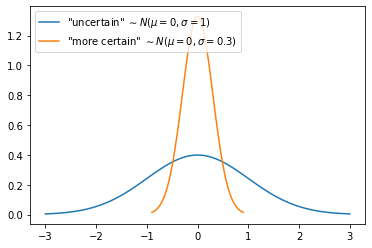

In [ ]:
# import math functions
from math import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# gaussian function
def gaussian_func(mu, sigma2, x):
    ''' f takes in a mean and squared variance, and an input x
       and returns the gaussian value.'''
    coefficient = 1.0 / sqrt(2.0 * pi *sigma2)
    exponential = exp(-0.5 * (x-mu) ** 2 / sigma2)
    return coefficient * exponential


#plot wide gaussian
mu = 0
sigma = 1
x_axis = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x_axis, norm.pdf(x_axis,mu,sigma), label='"uncertain" $\sim N(\mu=0,\sigma=1)$')


#plot narrow gaussian
mu = 0
sigma = 0.3
x_axis = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x_axis, norm.pdf(x_axis,mu,sigma), label='"more certain" $\sim N(\mu=0,\sigma=0.3)$')
plt.legend(loc='upper left')
plt.show()

Below is the complete `update` code that performs a parameter update when an initial belief and new measurement information are merged. 

The complete `predict` code that performs an update to a Gaussian after a motion is incorporated.

In [ ]:
# the update function
def update(mean1, var1, mean2, var2):
    ''' This function takes in two means and two squared variance terms,
        and returns updated gaussian parameters.'''
    # Calculate the new parameters
    new_mean = (var2*mean1 + var1*mean2)/(var2+var1)
    new_var = 1/(1/var2 + 1/var1)
    
    return [new_mean, new_var]


# the motion update/predict function
def predict(mean1, var1, mean2, var2):
    ''' This function takes in two means and two squared variance terms,
        and returns updated gaussian parameters, after motion.'''
    # Calculate the new parameters
    new_mean = mean1 + mean2
    new_var = var1 + var2
    
    return [new_mean, new_var]



[27.5, 2.25]


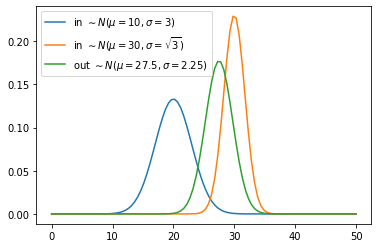

In [ ]:
# Test the above implementation
[mu0, sigma0] = update(20.0,9.0,30.0,3.0)
print([mu0, sigma0])

x_axis = np.linspace(0, 50, 100)
plt.plot(x_axis, norm.pdf(x_axis,20,np.sqrt(9.0)), label='in $\sim N(\mu=10,\sigma=3)$')
plt.plot(x_axis, norm.pdf(x_axis,30,np.sqrt(3.0)), label='in $\sim N(\mu=30,\sigma=\sqrt{3})$')
plt.plot(x_axis, norm.pdf(x_axis,mu0,sigma0), label='out $\sim N(\mu={m},\sigma={s})$'.format(m=mu0,s=sigma0))
plt.legend(loc='upper left')
plt.show()


## Example 1D - iterating

Write the complete 1D Kalman filter code that loops ("measurements" and "motions") through all of these in order.

Your complete code should look at sensor measurements then motions in that sequence until all updates are done!

### Initial Uncertainty

You'll see that you are given initial parameters below, and this includes and nitial location estimation, `mu` and squared variance, `sig`. Note that the initial estimate is set to the location 0, and the variance is extremely large. There are also values given for the squared variance associated with the sensor measurements and the motion, since neither of those readings are perfect, either.

You should see that even though the initial estimate for location (the initial `mu`) is far from the first measurement, it should catch up fairly quickly as you cycle through measurements and motions.

Update: [4.998000799680128, 3.9984006397441023]
Predict: [5.998000799680128, 5.998400639744102]
Update: [5.999200191953932, 2.399744061425258]
Predict: [6.999200191953932, 4.399744061425258]
Update: [6.999619127420922, 2.0951800575117594]
Predict: [8.999619127420921, 4.09518005751176]
Update: [8.999811802788143, 2.0235152416216957]
Predict: [9.999811802788143, 4.023515241621696]
Update: [9.999906177177365, 2.0058615808441944]
Predict: [10.999906177177365, 4.005861580844194]


Final result: [10.999906177177365, 4.005861580844194]


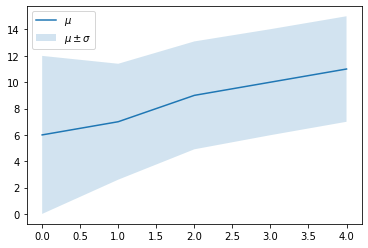

In [ ]:
# measurements for mu and motions, U
measurements = [5., 6., 7., 9., 10.]
motions = [1., 1., 2., 1., 1.]

# initial parameters
measurement_sig = 4.
motion_sig = 2.
mu = 0.
sig = 10000.


## TODO: Loop through all measurements/motions
# this code assumes measurements and motions have the same length
# so their updates can be performed in pairs

mu_time    = []  # mean over time
mu_dn_time = []  # mean + std_dev over time (for pretty plotting) 
mu_up_time = []  # mean - std_dev over time (for pretty plotting) 


times = range(len(measurements))
for n in times:
    # measurement update, with uncertainty
    mu, sig = update(mu, sig, measurements[n], measurement_sig)
    print('Update: [{}, {}]'.format(mu, sig))
    # motion update, with uncertainty
    mu, sig = predict(mu, sig, motions[n], motion_sig)
    print('Predict: [{}, {}]'.format(mu, sig))
    mu_time.append(mu)
    mu_dn_time.append(mu-sig)
    mu_up_time.append(mu+sig)

   
# print the final, resultant mu, sig
print('\n')
print('Final result: [{}, {}]'.format(mu, sig))


# Please note that the first point of the chart is AFTER
#  the first     predict + update     of the KF loop
plt.plot(times,mu_time, label='$\mu$')
plt.fill_between(times, mu_dn_time, mu_up_time, label='$\mu \pm \sigma$', alpha=0.2)
plt.legend(loc='upper left')
plt.show()


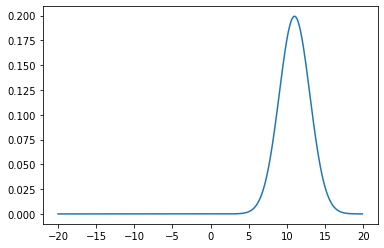

In [ ]:
## Print out and display the final, resulting Gaussian 
# set the parameters equal to the output of the Kalman filter result
mu = mu
sigma2 = sig

# define a range of x values
x_axis = np.arange(-20, 20, 0.1)

# create a corresponding list of gaussian values
gauss_shape = []
for x in x_axis:
    gauss_shape.append(gaussian_func(mu, sigma2, x)) # manually call our gaussian_func

# plot the result 
plt.plot(x_axis, gauss_shape)

# Example 5.2 - Train with position and velocity

Consider a train moving along a track. 

Its (scalar) position is $d$ and associated (scalar) velocity is $v$. 

The input is simply the acceleration $a$.

The measurement is only the train's position $d$.

Consider the following State and Measurements equations describing the mentioned stationary system:

$ \quad
\begin{align*}
  \begin{bmatrix}
    d_{n+1} \\
    v_{n+1}
  \end{bmatrix}  
  & = 
  \begin{bmatrix}
    1 & \Delta t \\
    0 & 1
  \end{bmatrix}
  \begin{bmatrix}
    d_{n} \\
    v_{n}
  \end{bmatrix}
  + 
  \begin{bmatrix}
    \frac{1}{2} \Delta t ^2\\
    \Delta t
  \end{bmatrix}
  [a]
\\
  \begin{bmatrix}   y_n  \end{bmatrix}   & = 
  \begin{bmatrix}   1 & 0 \end{bmatrix} 
  \begin{bmatrix}   d_n \\ v_n \end{bmatrix} 
\end{align*}
$

The code below will use a Kalman Filter to estimate the position of the train (this position is a Gaussian variable).

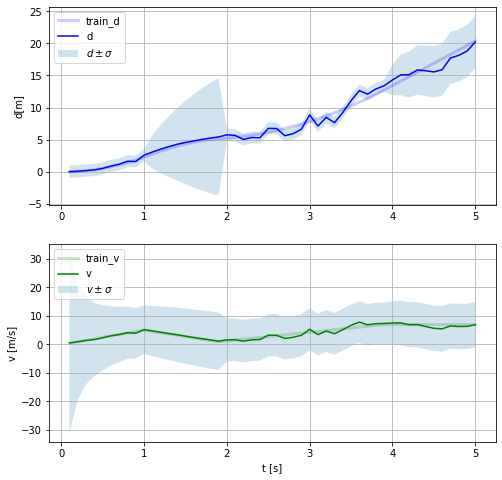

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from numpy import dot 
from numpy import * 
from numpy.linalg import inv 
from numpy.linalg import det
import random
random.seed(3)


def kf_predict(X, P, A, Q, B, U): 
    """      
      X : The mean state estimate of the previous step (k−1) - shape(m,1) 
      P : The state covariance of previous step (k−1) - shape(m,m) 
      A : The transition  matrix - shape(m,m) 
      Q : The process noise covariance matrix - shape(m,m) 
      B : The input effect matrix - shape(p, m) 
      U : The control input - shape(q,1)
    """ 
    X = A @ X + B @ U 
    P = A @ P @ A.T + Q 
    return(X,P) 

def kf_update(X, P, Y, H, R): 
    """      
      K  : the Kalman Gain matrix 
      IS : the Covariance or predictive mean of Y  
    """
    IS = H @ P @ H.T + R  
    K = P @ H.T @ inv(IS) 
    X = X + K @ (Y- H @ X) 
    P = P - K @ IS @ K.T 
#    P = P - K @ H @ P 
    return (X,P) 


#
#
# Initial Values
#
#

PI = np.pi

#Inter sample time
dt = 0.1; 

# ini state
X = np.array( [ [0.0] , [0.0]]  ) 

# ini Covar 
P = np.array( [ [ 999.0, 0.0 ] ,
                [ 0.0, 999.0 ] ]  ) 

# state matrix
A = np.array( [ [ 1.0, dt ] ,
                [ 0.0, 1.0  ] ] )         

# input effect matrix
B = np.array( [ [0.5*dt**2], [dt] ] )     

# meas matrix
H = np.array( [ [ 1.0, 0.0 ] ] )          


# meas noise
R = np.array([ [1.0] ] ) 

# process noise
Q = np.array(np.eye(2) * 5 ) 

# meas
Y = np.array([ [0.1] ])


# For Pritty Plotting
t=0
t_time = []      
d_time = []      # position of train over time (mean)
v_time = []      # velocity of train over time (mean)
d_sd_time = []   # position of train over time (std_dev)
v_sd_time = []   # velocity of train over time (std_dev)
d_up_time = []   # d mean + one std_dev
d_dn_time = []   # d mean - one std_dev
v_up_time = []   # v mean + one std_dev
v_dn_time = []   # v mean - one std_dev

train_d = 0      # real train position
train_v = 0      # real train velocity
train_a = 0      # real train acceleration (this is the input of the system)
train_d_time = []   # real train position
train_v_time = []   # real train velocity
train_a_time = []   # real train acceleration (this is the input of the system)

#
#
# "Simulation" + Kalman Filter loop
#
#

N_iter = 50    # implies dt*N_iter seconds

for i in arange(0, N_iter):
  t += dt;

  if t<1:
    train_a=5                 # acceleration 
    R = np.array([ [1.0] ] )  # meas noise
  elif t<2:
    train_a=-4.5                 # acceleration  
    R = np.array([ [1000.0] ] )  # meas noise
  elif t<4:
    train_a=3                 # acceleration 
    R = np.array([ [1.0] ] )  # meas noise
  else:
    train_a=0                  # acceleration 
    R = np.array([ [50.0] ] )  # meas noise

  U = np.array([ [train_a] ]) # put the input in the right variable

  train_d += train_v * dt     # real train position
  train_v += train_a * dt     # real train velocity

  train_d_time.append(train_d)     # real train position
  train_v_time.append(train_v)     # real train velocity
  train_a_time.append(train_a)     # real train acceleration

  Y = np.array([ [train_d * random.randrange(80, 120)/100 ] ]) # measurements are real +/- 20%

  (X, P) = kf_predict(X, P, A, Q, B, U)
  (X, P) = kf_update(X, P, Y, H, R) 
  
  #print(X)
  t_time.append(t)
  d_time.append( X[0].item() )
  v_time.append( X[1].item() )
  d_sd_time.append( sqrt( P[0][0]).item() )
  v_sd_time.append( sqrt( P[1][1]).item() )
  d_up_time.append( X[0].item() + sqrt( P[0][0]).item() )
  d_dn_time.append( X[0].item() - sqrt( P[0][0]).item() )
  v_up_time.append( X[1].item() + sqrt( P[1][1]).item() )
  v_dn_time.append( X[1].item() - sqrt( P[1][1]).item() )

# End For Loop



fig = plt.figure(figsize=(8,8))
# d
chart1 = fig.add_subplot(211)
chart1.plot(t_time, train_d_time, label='train_d', c="b", linewidth=3, alpha=0.2)
chart1.plot(t_time,d_time, label='d', c="b")
chart1.fill_between(t_time, d_dn_time, d_up_time, alpha=0.2, linewidth=0, label='$d\pm\sigma$')
plt.legend(loc='upper left')
chart1.set_ylabel('d[m]')
plt.grid()


# v
chart2 = fig.add_subplot(212)
chart2.plot(t_time, train_v_time, label='train_v', c="g", linewidth=3, alpha=0.2)
chart2.plot(t_time,v_time, label='v', c="g")
chart2.fill_between(t_time,v_dn_time,v_up_time, alpha=0.2, label='$v\pm\sigma$')
chart2.set_ylabel('v [m/s]')
chart2.set_xlabel('t [s]')
plt.legend(loc='upper left')
plt.grid()
plt.show()





# Example 5.3 - Tracking of mobile in wireless network 

Reference:

[2] Mohamed LAARAIEDH - https://arxiv.org/ftp/arxiv/papers/1204/1204.0375.pdf

[3] G. Shen, R. Zetik, and R. Thoma. 2008. "Performance Comparison of ToA and TDoA Based Location Estimation Algorithms in LOS Environment", WPNC'08 

We will present a simple tracking algorithm of a mobile user who is moving in a room and connected to at least three wireless antennas [3]. 
The matrix of measurement Y describes the estimated position of the mobile using a trilateration  algorithm  based on a least square estimation and the knowledge of at least  three  values  of  Time  of  Arrival  (ToA)  at  time  step  k .  These  values  are computed using ranging procedures between the mobile and the three antennas [3].  
Starting by an initialization of different matrices and using the updated matrices for each  step  and  iteration,  we  plot  in  Fig-  1  the  estimated,  the  real  trajectory  of  the mobile user, and the measurements performed by the least square based trilateration. 
We show here that the Kalman Filter enhances the accuracy of tracking compared to the  static  least  square  based  estimation.  The  Python  code  describing  the  tracking process is given as below. In order to simplify the understanding of this code, we draw the matrix Y randomly centered on the true value of mobile position. 


In [ ]:
from numpy import * 
from numpy.linalg import inv 
import numpy as np
from numpy import dot 
from numpy.linalg import det
from numpy.random import randn



#time step of mobile movement 
dt = 0.1 

# Initialization of state matrices 
X = array([[0.0], [0.0], [0.1], [0.1]]) 
P = diag((0.01, 0.01, 0.01, 0.01)) 
A = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]]) 
Q = eye(X.shape[0]) 
B = eye(X.shape[0]) 
U = zeros((X.shape[0],1)) 

# Measurement matrices 
Y = array([[X[0,0] + abs(randn(1)[0])], [X[1,0] + abs(randn(1)[0])]]) 
H = array([[1, 0, 0, 0], [0, 1, 0, 0]]) 
R = eye(Y.shape[0]) 
 
# Number of iterations in Kalman Filter 
N_iter = 50 
 
# Applying the Kalman Filter 
for i in arange(0, N_iter): 
  (X, P) = kf_predict(X, P, A, Q, B, U) 
  (X, P) = kf_update(X, P, Y, H, R) 
  Y = array([[X[0,0] + abs(0.1 * randn(1)[0])],[X[1, 0] + abs(0.1 * randn(1)[0])]]) 

  